# Imports

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading dataset and turning ints into floats for better performace

In [90]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Creating model

In [169]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer="l2")
])

# Making predictions and turning them into probability

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.14977102, 0.076687  , 0.07143319, 0.10852464, 0.08381711,
        0.14193021, 0.06259366, 0.07566711, 0.08320863, 0.1463674 ]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.10504833, 0.09764481, 0.09713314, 0.10080361, 0.09834351,
        0.10422789, 0.09627832, 0.09754527, 0.09828369, 0.10469139]],
      dtype=float32)

# Creating loss function

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [8]:
loss_fn(y_train[:1], predictions).numpy()

1.9524199

# Adding optimizer, loss function and accuracy as metrics to the model

In [170]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=7e-4, momentum=0.2, centered=True), loss=loss_fn, metrics=['accuracy'])

# Training the model

In [171]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2845 - accuracy: 0.9361 - val_loss: 0.1507 - val_accuracy: 0.9647
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1188 - accuracy: 0.9708 - val_loss: 0.1071 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0842 - accuracy: 0.9791 - val_loss: 0.0819 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0644 - accuracy: 0.9839 - val_loss: 0.0915 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0525 - accuracy: 0.9867 - val_loss: 0.0773 - val_accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0429 - accuracy: 0.9895 - val_loss: 0.0748 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0356 - accuracy: 0.9909 - val_loss: 0.0763 - val_ac

# Evaluating trained model by test data

In [172]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0699 - accuracy: 0.9837 - 1s/epoch - 3ms/step


[0.06987003237009048, 0.9836999773979187]

# Plotting the loss value and accuracy on both train and test data

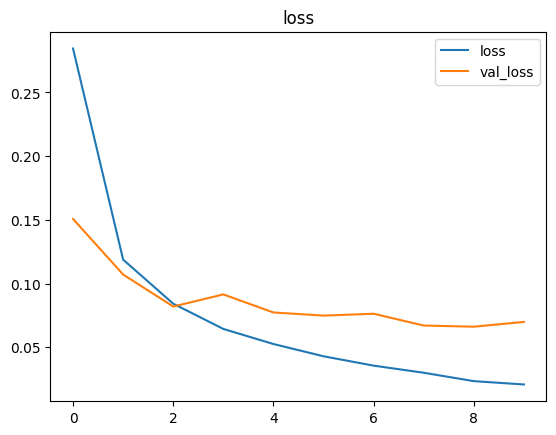

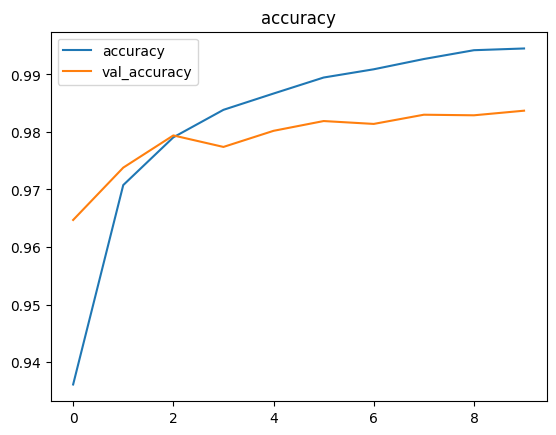

In [173]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()